# <center>Data Mining Project 2 Spring semester 2019-2020</center>
## <center>Παναγιώτης Ευαγγελίου &emsp; 1115201500039</center>
## <center>Γεώργιος Μαραγκοζάκης &emsp; 1115201500089</center>

___

### Do all the necessary imports for this notebook

In [1]:
# data processing
import pandas as pd
from sklearn.model_selection import train_test_split

# visualization
from wordcloud import WordCloud
from IPython.display import Image

# classification
from sklearn.model_selection import KFold
from IPython.display import display

# for data exploration
import os
import numpy as np


## __Dataset Preprocessing__

- ### *Make tsv files from all the txt files*

In [2]:
myCategoriesFolder = ['business','entertainment','politics', 'sport', 'tech']
dataPathDir = './fulltext/data/'

myDataSetDf = pd.DataFrame(columns=['ID', 'TITLE',  'CONTENT',  'CATEGORY'])
id_count = 0

for category in myCategoriesFolder:
    specificPath = dataPathDir + category + '/'

    # find the column's names of each csv
    for fileName in os.listdir(specificPath):
        # we need to check only .txt files
        if fileName.endswith(".txt"):
            
            thisTxt = open(os.path.join(specificPath, fileName),"r")
            thisTxtTitle = thisTxt.readline()

            # get rid of '\n' on the end of title line
            thisTxtTitle = thisTxtTitle.replace('\n', '')

            thisTxtContent = thisTxt.readlines()

            # get rid of empty lines '\n'
            thisTxtContent = list(filter(lambda a: a != '\n', thisTxtContent))

            # get rid of '\n' on the end of each line 
            thisTxtContent = [period.replace('\n', '') for period in thisTxtContent]

            # convert list of lines into a single string line
            thisTxtContent = ' '.join(thisTxtContent)

            myDataSetDf = myDataSetDf.append({'ID': id_count, 'TITLE': thisTxtTitle, 'CONTENT': thisTxtContent, 'CATEGORY': category.upper()}, ignore_index=True)
            thisTxt.close()

            id_count += 1

display(myDataSetDf)

,ID,TITLE,CONTENT,CATEGORY
0,0,Giant waves damage S Asia economy,"Governments, aid agencies, insurers and travel...",BUSINESS
1,1,EMI shares hit by profit warning,Shares in music giant EMI have sunk by more th...,BUSINESS
2,2,Barclays shares up on merger talk,Shares in UK banking group Barclays have risen...,BUSINESS
3,3,Trial begins of Spain's top banker,"The trial of Emilio Botin, the chairman of Spa...",BUSINESS
4,4,MG Rover China tie-up 'delayed',MG Rover's proposed tie-up with China's top ca...,BUSINESS
...,...,...,...,...
2219,2219,DVD copy protection strengthened,DVDs will be harder to copy thanks to new anti...,TECH
2220,2220,Slimmer PlayStation triple sales,Sony PlayStation 2's slimmer shape has proved ...,TECH
2221,2221,Format wars could 'confuse users',"Technology firms Sony, Philips, Matsushita and...",TECH
2222,2222,Mobile TV tipped as one to watch,"Scandinavians and Koreans, two of the most adv...",TECH


## __Make wordcloud for each category__

In [3]:
def makeWordCloud(myText, saveLocationPath, myMaxWords=100, myMask=None, myStopWords=None):
    '''Default function for generating wordcloud'''

    wc = WordCloud(background_color="white", mask=myMask, max_words=myMaxWords,
                   stopwords=myStopWords, contour_width=3, contour_color='steelblue',
                   width=600, height=600)

    # generate word cloud
    wc.generate(myText)

    # store to file

    wc.to_file(saveLocationPath)

    return saveLocationPath

In [4]:
def columnToText(myDfColumn):
    wholeColumnText = ''

    for text in myDfColumn:
        wholeColumnText = wholeColumnText + ' ' + text

    return wholeColumnText

- ### *Business Wordcloud*

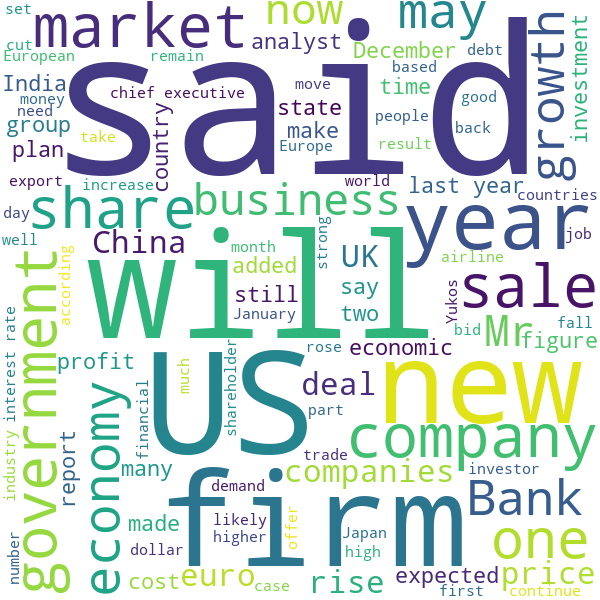

In [5]:

makeWordCloud(saveLocationPath="businessWordCloud.png", myText=columnToText(myDataSetDf[myDataSetDf['CATEGORY'] == "BUSINESS"]['CONTENT']))

Image('businessWordCloud.png')


- ### *Entertainment Wordcloud*

In [6]:

# to fill


- ### *Politics Wordcloud*

In [7]:

# to fill


- ### *Sport Wordcloud*

In [8]:

# to fill


- ### *Tech Wordcloud*

In [9]:

# to fill


## __Classification__

- ### *Split DataSet into TrainData and TestData*

In [10]:
trainDataSet, testDataSet = train_test_split(myDataSetDf, test_size=0.2, stratify=myDataSetDf['CATEGORY'])

# reset index
trainDataSet.reset_index(drop=True, inplace=True)
testDataSet.reset_index(drop=True, inplace=True)

# save to tsv files
trainDataSet.to_csv('train_set.tsv', sep = '\t')

# save test_set categories
testDataSetCategories = testDataSet[['CATEGORY']].copy()

testDataSetCategories.to_csv('test_set_categories.tsv', sep = '\t')

testDataSet = testDataSet.drop('CATEGORY', axis=1)
testDataSet.to_csv('test_set.tsv', sep = '\t')

In [11]:
myDataSetDf

,ID,TITLE,CONTENT,CATEGORY
0,0,Giant waves damage S Asia economy,"Governments, aid agencies, insurers and travel...",BUSINESS
1,1,EMI shares hit by profit warning,Shares in music giant EMI have sunk by more th...,BUSINESS
2,2,Barclays shares up on merger talk,Shares in UK banking group Barclays have risen...,BUSINESS
3,3,Trial begins of Spain's top banker,"The trial of Emilio Botin, the chairman of Spa...",BUSINESS
4,4,MG Rover China tie-up 'delayed',MG Rover's proposed tie-up with China's top ca...,BUSINESS
...,...,...,...,...
2219,2219,DVD copy protection strengthened,DVDs will be harder to copy thanks to new anti...,TECH
2220,2220,Slimmer PlayStation triple sales,Sony PlayStation 2's slimmer shape has proved ...,TECH
2221,2221,Format wars could 'confuse users',"Technology firms Sony, Philips, Matsushita and...",TECH
2222,2222,Mobile TV tipped as one to watch,"Scandinavians and Koreans, two of the most adv...",TECH


In [12]:
trainDataSet

,ID,TITLE,CONTENT,CATEGORY
0,228,GM pays $2bn to evade Fiat buyout,General Motors of the US is to pay Fiat 1.55bn...,BUSINESS
1,1072,Blair prepares to name poll date,Tony Blair is likely to name 5 May as election...,POLITICS
2,1039,Economy focus for election battle,Britain's economic future will be at the heart...,POLITICS
3,1321,England's defensive crisis grows,England's defensive worries have deepened foll...,SPORT
4,604,Famed music director Viotti dies,"Conductor Marcello Viotti, director of Venice'...",ENTERTAINMENT
...,...,...,...,...
1774,542,Hoffman hits out over modern film,Hollywood legend Dustin Hoffman has hit out at...,ENTERTAINMENT
1775,938,Labour chooses Manchester,The Labour Party will hold its 2006 autumn con...,POLITICS
1776,1645,Tevez - an Argentine in Brazil,Some 65 years ago Bernardo Gandulla left Boca ...,SPORT
1777,593,Angels 'favourite funeral song',Angels by Robbie Williams is the song Britons ...,ENTERTAINMENT


In [13]:
testDataSet

,ID,TITLE,CONTENT
0,635,No UK premiere for Rings musical,The producers behind the Lord of the Rings mus...
1,1135,Brown outlines third term vision,Gordon Brown has outlined what he thinks shoul...
2,2091,Lifestyle 'governs mobile choice',"Faster, better or funkier hardware alone is no..."
3,620,Stars shine on Bafta red carpet,Hollywood stars brought a touch of glamour to ...
4,1156,Muslims discuss election concerns,Issues that Muslims should be considering befo...
...,...,...,...
440,653,Film star Fox behind theatre bid,Leading actor Edward Fox is one of the men beh...
441,1806,Fear will help France - Laporte,France coach Bernard Laporte believes his team...
442,1057,Schools to take part in mock poll,Record numbers of schools across the UK are to...
443,2159,Text message record smashed again,UK mobile owners continue to break records wit...


In [14]:
testDataSetCategories

,CATEGORY
0,ENTERTAINMENT
1,POLITICS
2,TECH
3,ENTERTAINMENT
4,POLITICS
...,...
440,ENTERTAINMENT
441,SPORT
442,POLITICS
443,TECH


In [15]:
# use 10-fold cross validation
kf = KFold(n_splits=10)

In [16]:
kf

KFold(n_splits=10, random_state=None, shuffle=False)